<a href="https://colab.research.google.com/github/abiyappan/pyspark_dark/blob/main/Bigdataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('pyspark').getOrCreate()

In [ ]:
from google.colab import files
files.upload()


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df=spark.read.csv("/content/products-10000.csv",header=True,inferSchema=True)

In [50]:
df.show()

+-----+--------------------+--------------------+--------------------+--------------------+-----+--------+-----+-------------+--------------+-----------+-------------+-----------+
|  _c0|                 _c1|                 _c2|                 _c3|                 _c4|  _c5|     _c6|  _c7|          _c8|           _c9|       _c10|         _c11|       _c12|
+-----+--------------------+--------------------+--------------------+--------------------+-----+--------+-----+-------------+--------------+-----------+-------------+-----------+
|Index|                Name|         Description|               Brand|            Category|Price|Currency|Stock|          EAN|         Color|       Size| Availability|Internal ID|
|    1|Smart Fan Iron Co...|Catch enough role...|          Herman Ltd|      Kids' Clothing|  585|     USD|  194|3968600833473|      Cornsilk|     5x7 in|limited_stock|         54|
|    2|                 Fan|All movement yeah...|Braun, King and R...|      Grooming Tools|  992|   

In [75]:
df.head()


,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
0,1,Smart Fan Iron Cooker Go Wireless Portable,Catch enough role nearly.,Herman Ltd,Kids' Clothing,585,USD,194,3968600833473,Cornsilk,5x7 in,limited_stock,54
1,2,Fan,All movement yeah tax me.,"Braun, King and Rollins",Grooming Tools,992,USD,724,191126950284,Bisque,S,discontinued,49
2,3,Smart Speakerphone Charger Eco Plus Clean,Quickly inside pull line lay start.,Peck-Coleman,Fishing & Hunting,940,USD,769,7569143820621,Blue,Extra Large,pre_order,42
3,4,Premium Grill Trimmer Portable,Lawyer one than fire.,Hines Ltd,Skincare,324,USD,93,2705140928037,Ivory,50x70 cm,out_of_stock,93
4,5,Keyboard Freezer,Remain Congress blood plan voice.,"Spence, Webster and Orr",Laptops & Computers,908,USD,614,9830391008108,FloralWhite,10x10 cm,discontinued,91


array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Stock'}>,
        <Axes: title={'center': 'EAN'}>],
       [<Axes: title={'center': 'Internal ID'}>, <Axes: >]], dtype=object)

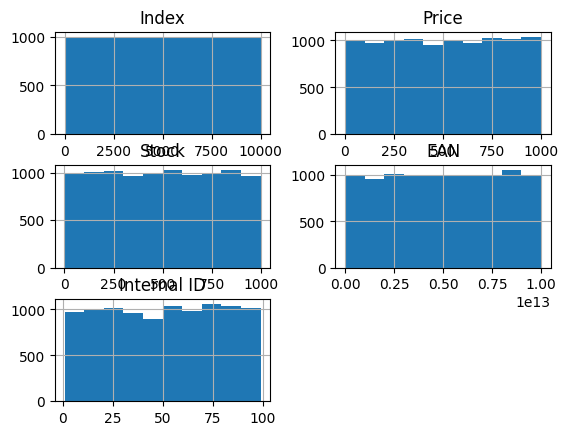

In [76]:
df.hist()

<Axes: xlabel='Size'>

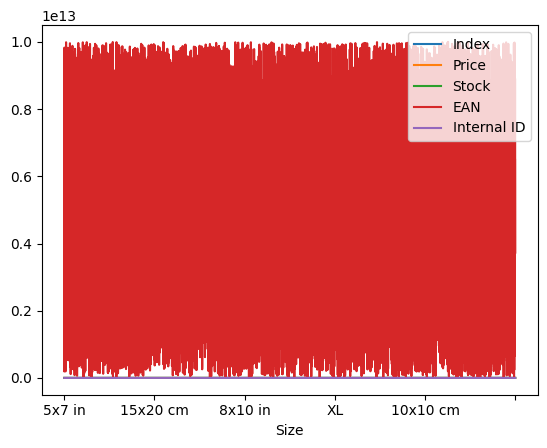

In [80]:
df.plot(10)

In [53]:
df.printSchema()

root
 |-- Index: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Stock: integer (nullable = true)
 |-- EAN: long (nullable = true)
 |-- Color: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Availability: string (nullable = true)
 |-- Internal ID: integer (nullable = true)



In [60]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import time

In [61]:
n=1000
df=pd.read_csv(r"/content/products-10000.csv")
print(df)



      Index                                        Name  \
0         1  Smart Fan Iron Cooker Go Wireless Portable   
1         2                                         Fan   
2         3   Smart Speakerphone Charger Eco Plus Clean   
3         4              Premium Grill Trimmer Portable   
4         5                            Keyboard Freezer   
...     ...                                         ...   
9995   9996                                   Powerbank   
9996   9997            Rechargeable Lamp Scanner Vacuum   
9997   9998                                      Heater   
9998   9999               Rechargeable Headphones Stove   
9999  10000                     Clean Charger Treadmill   

                                            Description  \
0                             Catch enough role nearly.   
1                             All movement yeah tax me.   
2                   Quickly inside pull line lay start.   
3                                 Lawyer one than fire.

In [72]:
ddf=dd.from_pandas(df,npartitions=100)
t=time.time()
result=ddf.groupby('Name')["Price"].sum().compute()
print(t)

1766903442.2716413


In [73]:
df.count()

,0
Index,10000
Name,10000
Description,10000
Brand,10000
Category,10000
Price,10000
Currency,10000
Stock,10000
EAN,10000
Color,10000


In [81]:
df.describe()

,Index,Price,Stock,EAN,Internal ID
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,503.370200,499.258000,5.035709e+12,50.475500
std,2886.89568,289.745777,287.993559,2.887653e+12,28.555993
min,1.00000,1.000000,1.000000,2.612759e+08,1.000000
25%,2500.75000,251.000000,249.000000,2.545172e+12,26.000000
50%,5000.50000,506.000000,500.000000,5.061908e+12,51.000000
75%,7500.25000,756.000000,751.000000,7.541982e+12,75.000000
max,10000.00000,999.000000,999.000000,9.999340e+12,99.000000


from matplotlib import pyplot as plt
_df_17['Index'].plot(kind='hist', bins=20, title='Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Stock'].plot(kind='hist', bins=20, title='Stock')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['EAN'].plot(kind='hist', bins=20, title='EAN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Index', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Price', y='Stock', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Stock', y='EAN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='EAN', y='Internal ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Index'].plot(kind='line', figsize=(8, 4), title='Index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Stock'].plot(kind='line', figsize=(8, 4), title='Stock')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['EAN'].plot(kind='line', figsize=(8, 4), title='EAN')
plt.gca().spines[['top', 'right']].set_visible(False)